# Using API to get weather data

In [29]:
# Importing packages
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Weather forecast

In [30]:
# weather forecast
url = (
    f'https://api.open-meteo.com/v1/'
    f'forecast?'
    f'latitude=40.3235&longitude=116.6308'
    f'&hourly=temperature_2m,precipitation,wind_speed_10m'
    f'&forecast_days=3'
)
print(url)

https://api.open-meteo.com/v1/forecast?latitude=40.3235&longitude=116.6308&hourly=temperature_2m,precipitation,wind_speed_10m&forecast_days=3


In [31]:
response = requests.get(url)
print(response)
data = response.json()

<Response [200]>


In [32]:
df_weather = pd.DataFrame(data['hourly'])

df_weather['latitude']= data['latitude']
df_weather['longitude']= data['longitude']
df_weather.head()


,time,temperature_2m,precipitation,wind_speed_10m,latitude,longitude
0,2024-05-26T00:00,19.0,0.0,2.4,40.375,116.625
1,2024-05-26T01:00,21.0,0.0,8.7,40.375,116.625
2,2024-05-26T02:00,22.0,0.0,14.8,40.375,116.625
3,2024-05-26T03:00,23.3,0.0,15.5,40.375,116.625
4,2024-05-26T04:00,24.6,0.0,16.4,40.375,116.625


## Air Quality data

In [33]:
# air quality
url = (
    f'https://air-quality-api.open-meteo.com/v1/'
    f'air-quality?'
    f'latitude=40.3235&longitude=116.6308'
    f'&hourly=pm10,pm2_5'
    f'&forecast_days=3'
)
print(url)

https://air-quality-api.open-meteo.com/v1/air-quality?latitude=40.3235&longitude=116.6308&hourly=pm10,pm2_5&forecast_days=3


In [34]:
response = requests.get(url)
print(response)

data = response.json()


<Response [200]>


In [35]:
df_airquality = pd.DataFrame(data['hourly'])

df_airquality['latitude']= data['latitude']
df_airquality['longitude']= data['longitude']
df_airquality.head()


,time,pm10,pm2_5,latitude,longitude
0,2024-05-26T00:00,20.5,13.9,40.40001,116.80002
1,2024-05-26T01:00,14.8,10.0,40.40001,116.80002
2,2024-05-26T02:00,16.5,11.3,40.40001,116.80002
3,2024-05-26T03:00,17.4,11.9,40.40001,116.80002
4,2024-05-26T04:00,18.1,12.4,40.40001,116.80002


## Merging data and Vizualization

In [38]:
df =pd.merge(left=df_airquality, right=df_weather, on='time')
df['time'] = pd.to_datetime(df['time'])
df.head()

,time,pm10,pm2_5,latitude_x,longitude_x,temperature_2m,precipitation,wind_speed_10m,latitude_y,longitude_y
0,2024-05-26 00:00:00,20.5,13.9,40.40001,116.80002,19.0,0.0,2.4,40.375,116.625
1,2024-05-26 01:00:00,14.8,10.0,40.40001,116.80002,21.0,0.0,8.7,40.375,116.625
2,2024-05-26 02:00:00,16.5,11.3,40.40001,116.80002,22.0,0.0,14.8,40.375,116.625
3,2024-05-26 03:00:00,17.4,11.9,40.40001,116.80002,23.3,0.0,15.5,40.375,116.625
4,2024-05-26 04:00:00,18.1,12.4,40.40001,116.80002,24.6,0.0,16.4,40.375,116.625


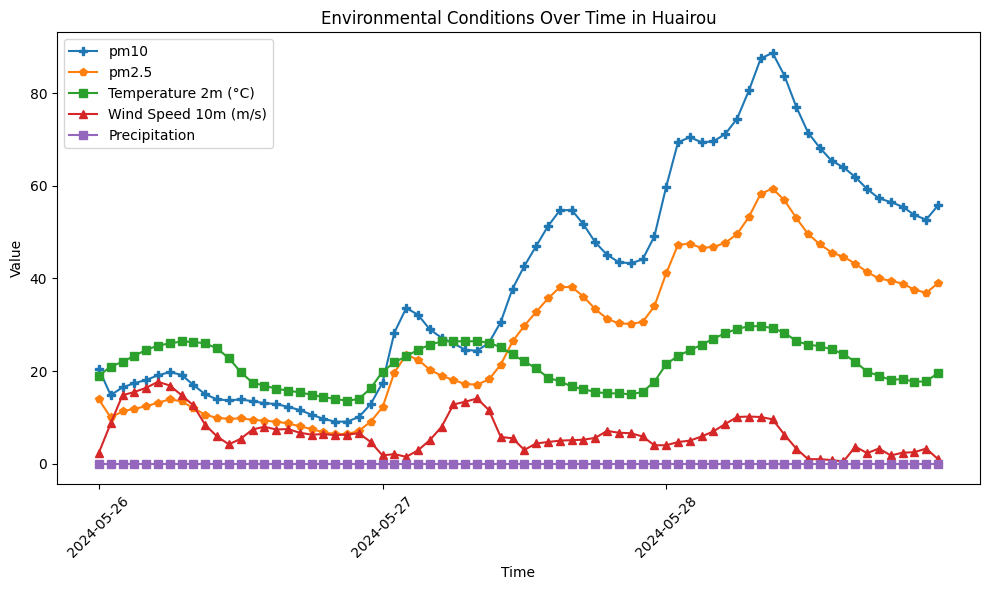

In [44]:
ticks = df[df['time'].dt.hour == 0]['time']

# Plot setup
plt.figure(figsize=(10, 6))

# Plotting the data
plt.plot(df['time'], df['pm10'], label='pm10', marker='P')
plt.plot(df['time'], df['pm2_5'], label='pm2.5', marker='p')
plt.plot(df['time'], df['temperature_2m'], label='Temperature 2m (°C)', marker='s')
plt.plot(df['time'], df['wind_speed_10m'], label='Wind Speed 10m (m/s)', marker='^')
plt.plot(df['time'], df['precipitation'], label='Precipitation', marker='s')


# Setting x-axis ticks to only those at 00:00
plt.gca().set_xticks(ticks)

# Formatting x-axis labels to display date and ensure "00:00" is implicit
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Environmental Conditions Over Time in Huairou')
plt.legend()

# Rotate date labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()